In [31]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

In [2]:
# functions
def get_brand(soup):
    try:
        brand=soup.find('span',attrs={'class' :  'a-size-base-plus a-color-base'})
        
        brand_value = brand.text
        
        brand_string = brand_value.strip()
        
    except:
        brand_string = ""
        
    return brand_string
    
def get_product_name(new_soup):
    try:
        product = new_soup.find('span',attrs={'id':'productTitle'})
        
        product_value = product.text
        
        product_string = product_value.strip()
        
    except:
        product_string = ""
        
    return product_string
    
def get_price(new_soup):
    try:
        price = new_soup.find('span', attrs={'class':'a-price-whole'})
        
        price_value = price.text
        
        price_string = price_value.strip()
        
    except:
        price_string = ""
        
    return price_string

def get_rating(new_soup):
    try:
        rating = new_soup.find('span',attrs={'class': 'a-icon-alt'}).text
        
        rating_string = rating.strip()
        
    except:
        rating_string = ""
        
    return rating_string

def get_availability(new_soup):
    try:
        availability = new_soup.find('div',attrs={ 'id' : 'availability'}).find('span').text.strip()
        # availability = availability.find('span').text
    
    except:
        availability = "Not available"
    return availability
    

In [3]:
# ///////////////////////////
if __name__ == '__main__':
    # header
    header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
        'Accept-Language': 'en-US'
    }
    
    # The Webpage URL
    url = "https://www.amazon.in/s?k=puma+white+shoes+for+man&crid=3QIV3HF7L7ZJM&sprefix=%2Caps%2C301&ref=nb_sb_ss_recent_1_0_recent"
    
    # HTTP request
    webpage = requests.get(url, headers=header)
    
    # soup object containing all data
    soup = BeautifulSoup(webpage.content, 'html.parser')
    
    # fetching link of the product
    links = soup.find_all("a", attrs={'class': 'a-link-normal s-line-clamp-2 s-link-style a-text-normal'})
    
    # list to store
    link_list = []
    
    # extracting the link
    for link in links:
        link_list.append(link.get('href'))
        
    # defining the dictionary to store the data
    data = {
        'brand': [],
        'Product Name': [],
        'Price': [],
        'Rating': [],
        'Availability': []
    }
    
    # iterating through the links
    for link in link_list:
        # appending the link to the base url
        link=link.strip()
        new_webpage = requests.get("https://www.amazon.in/" + link, headers=header)
        
        new_soup = BeautifulSoup(new_webpage.content, 'html.parser')
        soup = BeautifulSoup(webpage.content, 'html.parser')
        
        # function calls
        data['brand'].append(get_brand(soup))
        data['Product Name'].append(get_product_name(new_soup))
        data['Price'].append(get_price(new_soup))
        data['Rating'].append(get_rating(new_soup))
        data['Availability'].append(get_availability(new_soup))
    
   

In [4]:
data

{'brand': ['Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma',
  'Puma'],
 'Product Name': ['Puma Unisex-Adult Up Sneaker',
  'Puma Unisex-Adult 365215 Sneaker',
  'Puma Unisex rs-x Toys Sneaker',
  "Bacca Bucci® Men's Energy Afterburn Disruptor for Multiple Sports,Fashion, Party & Fun Shoes/Sneakers",
  'Puma Unisex Smashic Sneaker',
  "Puma Men's Cou

In [5]:
 # creating the DataFrame
df = pd.DataFrame(data)
    
    # saving the DataFrame to a csv file
df.to_csv('puma_shoes_data.csv', index=False)

    
print('Data saved successfully!')

Data saved successfully!


In [6]:
df

,brand,Product Name,Price,Rating,Availability
0,Puma,Puma Unisex-Adult Up Sneaker,"2,206",4.2 out of 5 stars,In stock
1,Puma,Puma Unisex-Adult 365215 Sneaker,"2,774",4.0 out of 5 stars,In stock
2,Puma,Puma Unisex rs-x Toys Sneaker,"2,999",3.9 out of 5 stars,In stock
3,Puma,Bacca Bucci® Men's Energy Afterburn Disruptor ...,"1,199",3.7 out of 5 stars,In stock
4,Puma,Puma Unisex Smashic Sneaker,"1,709",3.9 out of 5 stars,In stock
...,...,...,...,...,...
66,Puma,Skechers Men's D'Lites 4.0 Energy Code Lace Up...,"4,249",4.2 out of 5 stars,In stock
67,Puma,Puma Unisex-Adult Up Sneaker,"2,206",4.2 out of 5 stars,In stock
68,Puma,Bacca Bucci MEGA Flex Hi Top Street Fashion Ch...,"1,799",4.1 out of 5 stars,In stock
69,Puma,Cruiser Chunky Sneaker for Men | Bold & Stylis...,999,4.6 out of 5 stars,Available to ship in 1-2 days


# Data Analysis

In [7]:
df.head()

,brand,Product Name,Price,Rating,Availability
0,Puma,Puma Unisex-Adult Up Sneaker,"2,206",4.2 out of 5 stars,In stock
1,Puma,Puma Unisex-Adult 365215 Sneaker,"2,774",4.0 out of 5 stars,In stock
2,Puma,Puma Unisex rs-x Toys Sneaker,"2,999",3.9 out of 5 stars,In stock
3,Puma,Bacca Bucci® Men's Energy Afterburn Disruptor ...,"1,199",3.7 out of 5 stars,In stock
4,Puma,Puma Unisex Smashic Sneaker,"1,709",3.9 out of 5 stars,In stock


In [8]:
df.tail()

,brand,Product Name,Price,Rating,Availability
66,Puma,Skechers Men's D'Lites 4.0 Energy Code Lace Up...,"4,249",4.2 out of 5 stars,In stock
67,Puma,Puma Unisex-Adult Up Sneaker,"2,206",4.2 out of 5 stars,In stock
68,Puma,Bacca Bucci MEGA Flex Hi Top Street Fashion Ch...,"1,799",4.1 out of 5 stars,In stock
69,Puma,Cruiser Chunky Sneaker for Men | Bold & Stylis...,999,4.6 out of 5 stars,Available to ship in 1-2 days
70,Puma,Woodland Men's Leather Sneaker,"2,693",4.0 out of 5 stars,In stock


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         71 non-null     object
 1   Product Name  71 non-null     object
 2   Price         71 non-null     object
 3   Rating        71 non-null     object
 4   Availability  71 non-null     object
dtypes: object(5)
memory usage: 2.9+ KB


In [10]:
df.isna().sum()

brand           0
Product Name    0
Price           0
Rating          0
Availability    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(6)

In [12]:

df.drop('brand', axis=1, inplace=True)


In [13]:
for column in df.columns:
    print(f"Value counts for column {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for column Product Name:
Product Name
Puma Unisex-Adult Up Sneaker                                                                                                                                                     4
Puma Unisex-Adult 365215 Sneaker                                                                                                                                                 3
Skechers Men's D'Lites 4.0 Energy Code Lace Up Shoe                                                                                                                              2
Bacca Bucci® Men's Energy Afterburn Disruptor for Multiple Sports,Fashion, Party & Fun Shoes/Sneakers                                                                            1
Puma Unisex rs-x Toys Sneaker                                                                                                                                                    1
                                                      

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
for i in df['Product Name']:
    if len(i) == 0:
        df.drop(df[df['Product Name'] == i].index, inplace=True)
        

In [16]:
for i in df['Price']:
    if len(i) == 0:
        df.drop(df[df['Price'] == i].index, inplace=True)

In [17]:
for i in df['Rating']:
    if len(i) == 0:
        df.drop(df[df['Rating'] == i].index, inplace=True)

In [18]:
df

,Product Name,Price,Rating,Availability
0,Puma Unisex-Adult Up Sneaker,"2,206",4.2 out of 5 stars,In stock
1,Puma Unisex-Adult 365215 Sneaker,"2,774",4.0 out of 5 stars,In stock
2,Puma Unisex rs-x Toys Sneaker,"2,999",3.9 out of 5 stars,In stock
3,Bacca Bucci® Men's Energy Afterburn Disruptor ...,"1,199",3.7 out of 5 stars,In stock
4,Puma Unisex Smashic Sneaker,"1,709",3.9 out of 5 stars,In stock
...,...,...,...,...
64,Neeman's The Exuberants Sneakers for Men | Com...,"1,626",3.8 out of 5 stars,In stock
65,Puma Unisex-Adult Darter Pro Running Shoe,"6,999",4.6 out of 5 stars,In stock
68,Bacca Bucci MEGA Flex Hi Top Street Fashion Ch...,"1,799",4.1 out of 5 stars,In stock
69,Cruiser Chunky Sneaker for Men | Bold & Stylis...,999,4.6 out of 5 stars,Available to ship in 1-2 days


In [19]:
import re

In [20]:
# removing the unknown brands

for i in df['Product Name']:
    if re.search('puma', i, re.IGNORECASE) is None:
        df.drop(df[df['Product Name'] == i].index, inplace=True)

In [21]:
df

,Product Name,Price,Rating,Availability
0,Puma Unisex-Adult Up Sneaker,"2,206",4.2 out of 5 stars,In stock
1,Puma Unisex-Adult 365215 Sneaker,"2,774",4.0 out of 5 stars,In stock
2,Puma Unisex rs-x Toys Sneaker,"2,999",3.9 out of 5 stars,In stock
4,Puma Unisex Smashic Sneaker,"1,709",3.9 out of 5 stars,In stock
5,Puma Men's Court Shatter Low Sneaker,"2,279",4.1 out of 5 stars,In stock
6,Puma Unisex-Adult Unisex BMW MMS Drift Cat Del...,"2,959",3.9 out of 5 stars,In stock
12,Puma Men's Dexfly V1 Sneaker,"1,999",3.8 out of 5 stars,In stock
13,Puma Unisex-Adult Duke Sneaker,"1,952",4.0 out of 5 stars,In stock
14,Puma Unisex .0 Essentials Sneaker,"3,279",3.8 out of 5 stars,In stock
15,Puma Mens Cell Fraction Fade Res Running Shoe,"2,799",Previous page,In stock


In [22]:
df['Price']

0     2,206
1     2,774
2     2,999
4     1,709
5     2,279
6     2,959
12    1,999
13    1,952
14    3,279
15    2,799
16    2,365
17    2,959
19    2,099
20    3,419
21    2,399
22    1,999
23    1,980
24    1,714
25    1,714
26    1,349
27    1,499
28    3,599
30    2,674
31    2,499
32    2,500
33    1,799
34    3,849
35    2,659
36    3,299
37    3,999
38    1,919
39    4,584
42    2,000
43    3,185
44    2,799
45    2,494
46    4,199
47    2,140
49    2,789
50    5,599
51    4,799
52    1,799
53    4,799
54    3,842
55    2,079
56    3,899
57    3,849
58    1,924
59    3,440
60    4,399
61    3,029
62    3,849
63    3,299
65    6,999
Name: Price, dtype: object

In [23]:
df["Price"] = df["Price"].str.replace(",", "").astype(float).astype(int)

In [24]:
df

,Product Name,Price,Rating,Availability
0,Puma Unisex-Adult Up Sneaker,2206,4.2 out of 5 stars,In stock
1,Puma Unisex-Adult 365215 Sneaker,2774,4.0 out of 5 stars,In stock
2,Puma Unisex rs-x Toys Sneaker,2999,3.9 out of 5 stars,In stock
4,Puma Unisex Smashic Sneaker,1709,3.9 out of 5 stars,In stock
5,Puma Men's Court Shatter Low Sneaker,2279,4.1 out of 5 stars,In stock
6,Puma Unisex-Adult Unisex BMW MMS Drift Cat Del...,2959,3.9 out of 5 stars,In stock
12,Puma Men's Dexfly V1 Sneaker,1999,3.8 out of 5 stars,In stock
13,Puma Unisex-Adult Duke Sneaker,1952,4.0 out of 5 stars,In stock
14,Puma Unisex .0 Essentials Sneaker,3279,3.8 out of 5 stars,In stock
15,Puma Mens Cell Fraction Fade Res Running Shoe,2799,Previous page,In stock


In [25]:
# extracting the float values from Rating

df['Rating'] = df['Rating'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [26]:
df

,Product Name,Price,Rating,Availability
0,Puma Unisex-Adult Up Sneaker,2206,4.2,In stock
1,Puma Unisex-Adult 365215 Sneaker,2774,4.0,In stock
2,Puma Unisex rs-x Toys Sneaker,2999,3.9,In stock
4,Puma Unisex Smashic Sneaker,1709,3.9,In stock
5,Puma Men's Court Shatter Low Sneaker,2279,4.1,In stock
6,Puma Unisex-Adult Unisex BMW MMS Drift Cat Del...,2959,3.9,In stock
12,Puma Men's Dexfly V1 Sneaker,1999,3.8,In stock
13,Puma Unisex-Adult Duke Sneaker,1952,4.0,In stock
14,Puma Unisex .0 Essentials Sneaker,3279,3.8,In stock
15,Puma Mens Cell Fraction Fade Res Running Shoe,2799,NaN,In stock


In [27]:
for i in df['Availability']:
    if i != "Out Of Stock":
        df['availability'] = "In Stock"
        

In [29]:
df.drop('Availability', axis=1, inplace=True)

In [30]:
df

,Product Name,Price,Rating,availability
0,Puma Unisex-Adult Up Sneaker,2206,4.2,In Stock
1,Puma Unisex-Adult 365215 Sneaker,2774,4.0,In Stock
2,Puma Unisex rs-x Toys Sneaker,2999,3.9,In Stock
4,Puma Unisex Smashic Sneaker,1709,3.9,In Stock
5,Puma Men's Court Shatter Low Sneaker,2279,4.1,In Stock
6,Puma Unisex-Adult Unisex BMW MMS Drift Cat Del...,2959,3.9,In Stock
12,Puma Men's Dexfly V1 Sneaker,1999,3.8,In Stock
13,Puma Unisex-Adult Duke Sneaker,1952,4.0,In Stock
14,Puma Unisex .0 Essentials Sneaker,3279,3.8,In Stock
15,Puma Mens Cell Fraction Fade Res Running Shoe,2799,NaN,In Stock


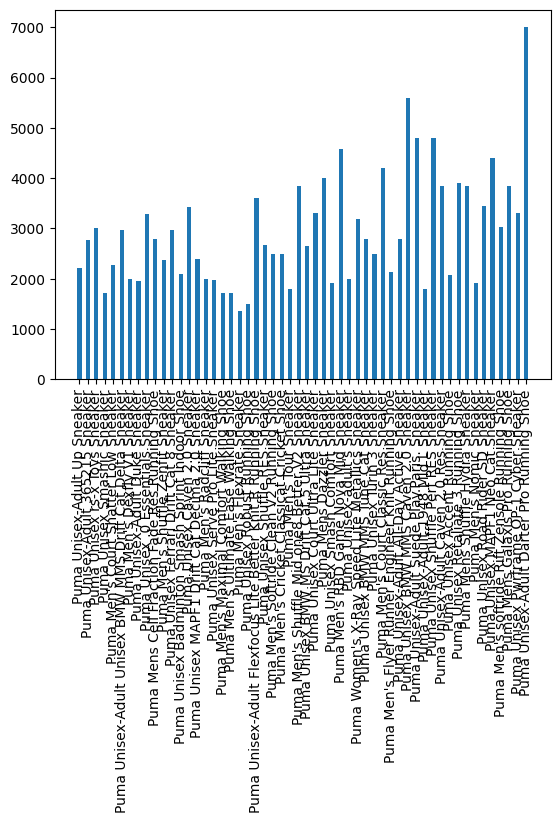

In [50]:
plt.bar(df['Product Name'],df['Price'],width=0.5)
plt.xticks(rotation=90)
plt.Figure(figsize=(30,8))


plt.show()



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Puma Unisex-Adult Up Sneaker'),
  Text(1, 0, 'Puma Unisex-Adult 365215 Sneaker'),
  Text(2, 0, 'Puma Unisex rs-x Toys Sneaker'),
  Text(3, 0, 'Puma Unisex Smashic Sneaker'),
  Text(4, 0, "Puma Men's Court Shatter Low Sneaker"),
  Text(5, 0, 'Puma Unisex-Adult Unisex BMW MMS Drift Cat Delta Sneaker'),
  Text(6, 0, "Puma Men's Dexfly V1 Sneaker"),
  Text(7, 0, 'Puma Unisex-Adult Duke Sneaker'),
  Text(8, 0, 'Puma Unisex .0 Essentials Sneaker'),
  Text(9, 0, 'Puma Mens Cell Fraction Fade Res Running Shoe'),
  Text(10, 0, "Puma Men's Shuffle Zenfit Sneaker"),
  Text(11, 0, 'Puma Unisex Ferrari Drift Cat 8 Sneaker'),
  Text(12, 0, 'Puma Unisex Badminton Smash Sprint I

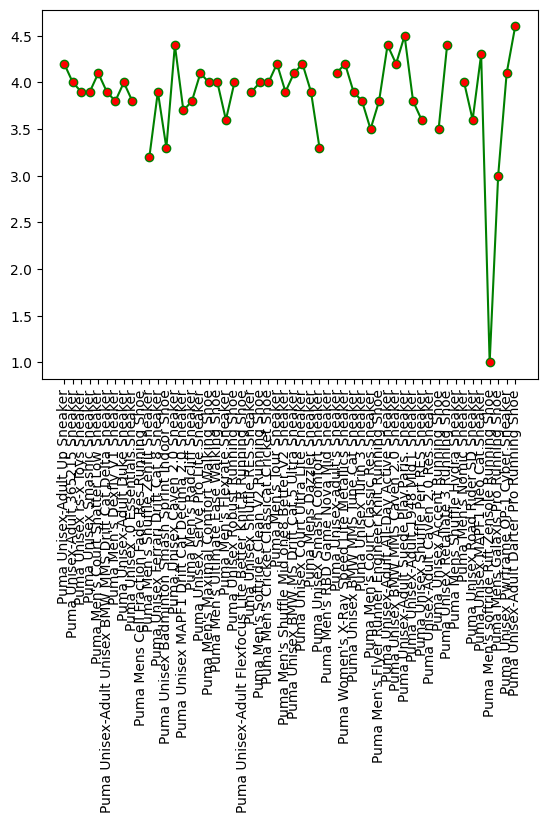

In [66]:
# give a plot for rating
plt.plot(df['Product Name'],df['Rating'],marker='o',markerfacecolor='r',color='green')
plt.xticks(rotation=90)



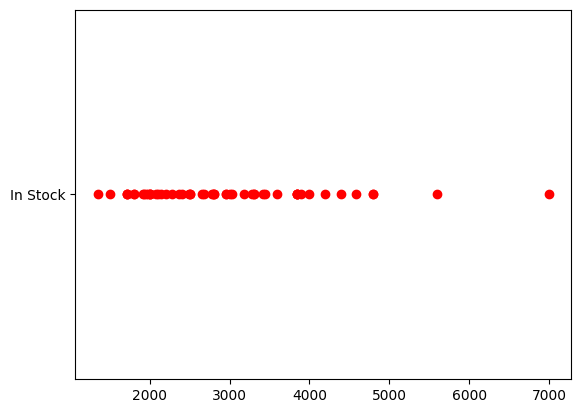

In [67]:
# price vs Availability 
plt.scatter(df['Price'],df['availability'],color='red')